### Notebook index

[3 Minimal examples](03-minimal.ipynb)  
[4 Plotting chromosomes](04-plotting.ipynb)   
[5 Multiple OTUs](05-multiple.ipynb)    
[6 Changing units](06-units.ipynb)  
[7 GISH](07-gish.ipynb)  
[8 Groups](08-groups.ipynb)  
[9 Circular Plots](09-circular.ipynb)  
[10 Plotting alongside phylogeny](10-phylogeny.ipynb)  
[11 Citrus](11-citrushelp.ipynb)  
[12 Human Karyotype](12-human.ipynb)  

# *Citrus* 

In [1]:
# General jupyter instructions

In [2]:
# press Ctrl + Enter to RUN active cell

# SHOW keyboard shortcuts Ctrl + M then H (only jupyter notebooks and colab)

# Ctrl + D (or X) DELETE a line of code

# press Ctrl + M to escape from cell (opposite to ENTER)

# then !
# B to ADD cell below or A above
# M to turn code cell into MARKDOWN
# Y turn markdown to CODE
# O to toggle OUTPUT
# D D to DELETE cell

# If in jupyter-lab:
# collapse cell clicking in the blue left bar
# use the settings menu to use the dark theme

# if in colab:
# remove bar at 80 in tools, preferences, 80 -> 0

In [3]:
# install if necessary

if (system.file(package = "idiogramFISH") == '') {
  install.packages("idiogramFISH")
}

library(idiogramFISH)

version 2.0.6 See help: ?idiogramFISH - browseVignettes('idiogramFISH') - https://ferroao.gitlab.io/manualidiogramfish



## *C. maxima* as da-Costa-Silva et al. [-@DaCostaSilva2019]

### data.frame of chr. size and marks {-}

Main three data.frames: 

* One for chr. sizes (parameter `dfChrSize`)
* One for marks' positions  (parameter `dfMarkPos`)
* One (optional) for mark style (parameter `dfMarkColor`)

In this example two of them (1 and 2) will be obtained from a larger data.frame `citrusMaximaChrMark`.

Column `chrNameUp` will be used in this case for unifying the chr. names (`chrName`) in both data.frames. 


In [53]:
# C. maxima 'pink'
# 4A 2C 4D 6F 2FL

{
citrusMaximaChrMark<-read.table(text="
chrName chrNameUp shortArmSize	longArmSize	markName	chrRegion	markDistCen	markSize
FL 1	67	97	24c13   p	52	10
D  2	62	75	21L13   q	35	8
D  2	62	75	CMA     q	43	32
A  3	70	103	45S     p	6   16
A  3	70	103	14A12   p	32	8
A  3	70	103	CMA     p	40	30
A  3	70	103	28A07   q	54	10
A  3	70	103	CMA     q	64	39
D  4	59	84	02C12   p	31	10
D  4	59	84	20C13   q	32	9
D  4	59	84	cma     q	48	36
F  5	52	74	5s      p	18	10
C  6	62	86	28A05   p	22	9
C  6	62	86	cma     p	40	22
C  6	62	86	cma     q	61	25
A  7	57	96	45S     p	 6  18
A  7	57	96	cma     p	38	19
A  7	57	96	cma     q	62	34
F  8	41	72	01b09   q	47	8
F  9	40	72	55b01/59C23   q	24	13", header =TRUE)
}

### data.frame of chr. sizes

Main columns: `chrName`, `shortArmSize`, `longArmSize`, `OTU` (optional when only one OTU), `group` (optional)

Column `chrNameUp` will be used in this case for unifying the chr. names (`chrName`) between data.frames. 


In [54]:
{
require(idiogramFISH)
  
# column and row subset
citrusMaxima<- citrusMaximaChrMark[,1:4][!duplicated(citrusMaximaChrMark[,1:4]),]

# chr. name change (unique)
citrusMaxima$chrName<-make.uniqueIF(citrusMaxima$chrName)

# chr. size in pixels
chrSizes <- citrusMaxima$shortArmSize+citrusMaxima$longArmSize

# max. size in μm.
maxSize <-3.6
maxPixel<-max(chrSizes)

# pixel to microm. 
citrusMaxima$shortArmSize<-citrusMaxima$shortArmSize/(maxPixel/maxSize)
citrusMaxima$longArmSize <-citrusMaxima$longArmSize /(maxPixel/maxSize)

citrusMaxima$OTU<- "C. maxima 'Pink'"

# add groups (pairs)
citrusMaxima$group<-1:9
}

### data.frame of marks' positions

Main columns: `chrName`, `markName`, `chrRegion` (arm), `markDistCen` (mark distance to centr.), `markSize`

Column `chrNameUp` will be used in this case for unifying the chr. names (`chrName`) between data.frames. 

Column `OTU` is mandatory because is present in first data.frame (`citrusMaxima`)


In [55]:
{
# Select columns
citrusMaximaMarkPos<- citrusMaximaChrMark[,c(1:2,5:8)][!duplicated(citrusMaximaChrMark[,c(1:2,5:8)] ),]

# transcribe chr.names - changed above. needs common column (i.e. chrNameUp)
citrusMaximaMarkPos$chrName<-citrusMaxima$chrName[match(citrusMaximaMarkPos$chrNameUp,citrusMaxima$chrNameUp )]

#pixel to μm. 
citrusMaximaMarkPos$markDistCen<-citrusMaximaMarkPos$markDistCen/(maxPixel/maxSize)
citrusMaximaMarkPos$markSize<-citrusMaximaMarkPos$markSize/(maxPixel/maxSize)

# OTU column
citrusMaximaMarkPos$OTU<-unique(citrusMaxima$OTU)

# fix case
citrusMaximaMarkPos$markName<-toupper(citrusMaximaMarkPos$markName)
}

### data.frame of marks' style

Optional data.frame. Add color and style for marks present in `citrusMaximaMarkPos`


In [56]:
{
unique(citrusMaximaMarkPos$markName)
# "24C13" "21L13" "CMA" "45S" "14A12"   "28A07" "02C12"   "20C13" "5S"  "28A05" "01B09" "55B01/59C23"

# make d.f. of styles of marks
markStyleDF   <- makedfMarkColorMycolors(
  unique(citrusMaximaMarkPos$markName), 
  c("chocolate","chocolate","darkgoldenrod1","chartreuse3", rep("chocolate",4),"red", rep("chocolate",3) )
)

}

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



### Notes and plot

Two optional data.frames for adding notes to plot with columns `OTU` and `note`.

Parameters: `leftNotes` and `notes`


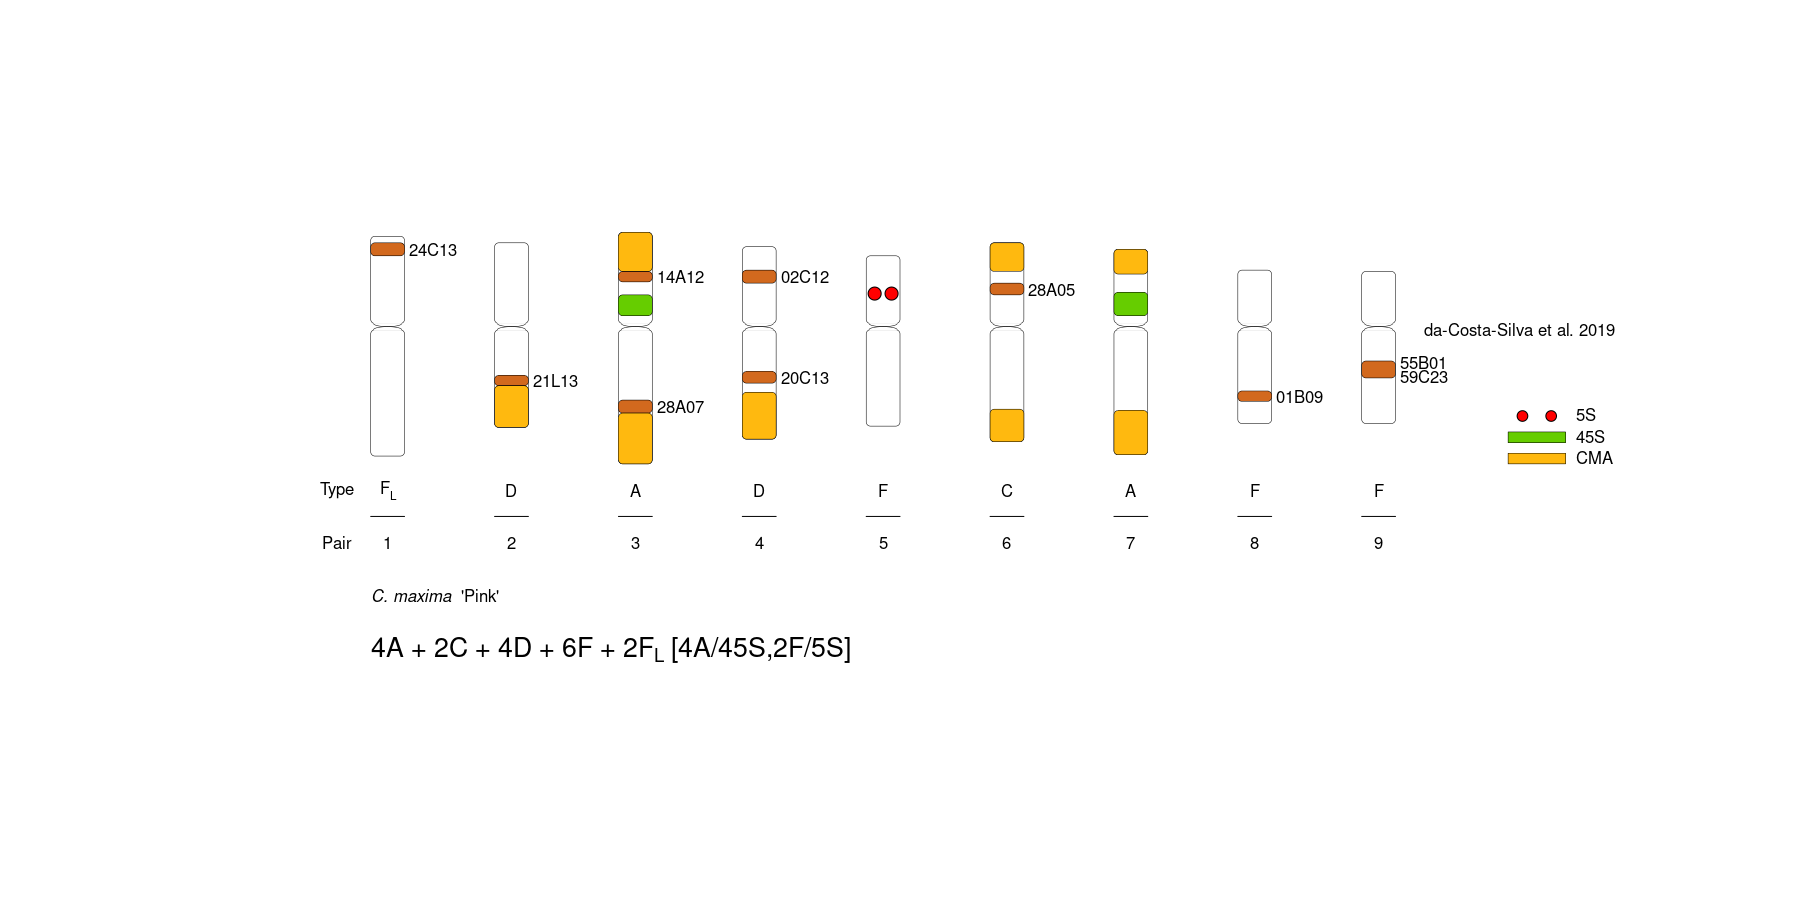

In [57]:
# notes
{
# formula
maxima<-"4A + 2C + 4D + 6F + 2FL [4A/45S,2F/5S]"
leftNotesdf<- data.frame(OTU=unique(citrusMaxima$OTU), note= maxima  )

# authors
notesdf<- data.frame(OTU=unique(citrusMaxima$OTU), note="da-Costa-Silva et al. 2019" )
}

# add group column to show that each one is a pair
{
par(mar=rep(0,4),oma=rep(0,4))

options(repr.plot.width = 18, repr.plot.height = 9, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= citrusMaxima,        # chr. size data.frame
              dfMarkPos= citrusMaximaMarkPos, # mark position data.frame 
              dfMarkColor=markStyleDF,        # mark style d.f.
              
              orderChr = "original",  # order of chr. as in d.f.
              chrIdPatternRem="_.*",  # regex pattern to remove from chr. names
              classChrName = "Type",  # chr. names title
              chrWidth = 0.3,         # chr. width
              chrSpacing=0.40,        # separ. among chr.
              groupSepar = 1          # factor to multiply chr. spacing among groups
              ,chromatids = FALSE     # don't use chromatids
              ,chrColor= "white"      # chr. color
              ,classGroupName = "Pair"# groups title
              ,chrBorderColor ="black"# border color
              ,lwd.chr = 0.5          # border width
              
              ,legend="inline"        # label location
              ,bannedMarkName = c("CMA","45S","5S") # don't show this (inline)
              ,bMarkNameAside =TRUE   # show banned marks "aside" 
              ,legendHeight=1.7       # height of labels (aside)
              ,colorBorderMark="black"# color of border of marks
              
              ,markNewLine = "/"      # split mark name to new line
              
              ,ruler=FALSE            # don't use ruler
              ,threshold=40           # fix scale, when too much shrinking
              
              ,distTextChr = .7       # distance text to chr.
              ,chrIndex = ""          # don't use chr. indices
              ,morpho=""              # don't use morphology
              ,karIndex = FALSE       # don't use kar. indices
              
              ,OTUfont=3              # OTU name in italics
              
              ,leftNotesTextSize = 1.6# font size of notes
              ,leftNotes=leftNotesdf  # data.frame with left notes
              ,leftNotesPosX = 0      # horizontal pos. of formula
              ,leftNotesPosY = 0.5
              ,notes = notesdf        # right notes - authors
              
              ,ylimBotMod = 1         # modify ylim bottom argument
              ,ylimTopMod = 0         # modify ylim top argument
              ,xlimLeftMod = 2        # modify left xlim
              ,xlimRightMod = 3       # modify right xlim
)
)
}

## *C. reticulata* as da-Costa-Silva et al. [-@DaCostaSilva2015]

### Chr. size data.frame


In [9]:
#
#   chr. size - arms in pixels
#

{
  citrusReticulata<-read.table(text="
chrName shortArmSize longArmSize totalMicro  Mbp   group
f       67            91          2.65       50.96 1
d       61            77          2.32       44.60 2
c       59            78          2.18       41.81 3
d       61            83          2.49       47.75 4
d       34            63          1.87       35.90 5
d       34            63          1.87       35.90 5
d       50            66          1.93       37    6
d       50            83          2.28       43.72 7
f       42            77          2.02       38.78 8
f       28            67          1.70       32.57 9", header =T)
  
  citrusReticulata$pixeltotal <- citrusReticulata$shortArmSize+citrusReticulata$longArmSize
  
  # pixel to micrometers
  citrusReticulata$shortArmSize<- citrusReticulata$shortArmSize/(citrusReticulata$pixeltotal/citrusReticulata$totalMicro)
  citrusReticulata$longArmSize <- citrusReticulata$longArmSize /(citrusReticulata$pixeltotal/citrusReticulata$totalMicro)
  
  # change chr. names avoiding duplicates
  citrusReticulata$chrName<-toupper(citrusReticulata$chrName)
  citrusReticulata$chrName<-make.uniqueIF(citrusReticulata$chrName)
  
  # add OTU
  citrusReticulata$OTU<-"C. reticulata 'Cravo'"
  
  # replicate name for plotting it over chrs.
  citrusReticulata$chrNameUp<-citrusReticulata$chrName
}


### Marks

In [10]:
citrusReticulataMarkPosDF<-  read.table(text="
chrName chrRegion markName markDistCen markSize    
     F_1      p    24C13   0.87  0.12
       C      p      CMA   0.64  0.30 
       C      q      CMA   0.84  0.40
       C      p     14A12  0.48  0.11
       C      q    28A07   0.77  0.14
       C      p      45S   0.00  0.10
     D_1      q      CMA   0.54  0.75
     D_1      p    21L13   0.67  0.14
     D_2      q      CMA   0.88  0.55
     D_2      p    02C12   0.5   0.14
     D_2      q    20C13   0.42  0.14
     D_3      p      CMA   0.35  0.30 
     D_3      p     c45S   0.35  0.35
     D_3      p      CMA   0.8   0.15
     D_3      p     c45S   0.8   0.15
     D_4      p      CMA   0.35  0.30 
     D_4      p      45S   0.35  0.30 
     D_5      p    28A05   0.66  0.14 
     D_5      q      CMA   0.50  0.60 
     D_6      q      CMA   0.72  0.70 
     F_2      q    01B09   0.8   0.14
     F_3      q    55B01   0.3   0.18
     F_3      q    59C23   0.3   0.18", header =T, stringsAsFactors=F) 

# marks' style data.frame
message("mark names:")
unique(citrusReticulataMarkPosDF$markName)

markStyleDF   <- makedfMarkColorMycolors(
  unique(citrusReticulataMarkPosDF$markName), 
  c("chocolate","darkgoldenrod1","chocolate","chocolate","chartreuse3",rep("chocolate",3),"chartreuse3",rep("chocolate",4) ) 
)

# square mark with label to the left (squareLeft style)
markStyleDF[which(markStyleDF$markName=="59C23"),]$style<-"squareLeft"

# add OTU!
citrusReticulataMarkPosDF$OTU<-unique(citrusReticulata$OTU)

mark names:



[1] "24C13" "CMA"   "14A12" "28A07" "45S"   "21L13" "02C12" "20C13" "c45S" 
[10] "28A05" "01B09" "55B01" "59C23"

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



### Plotting


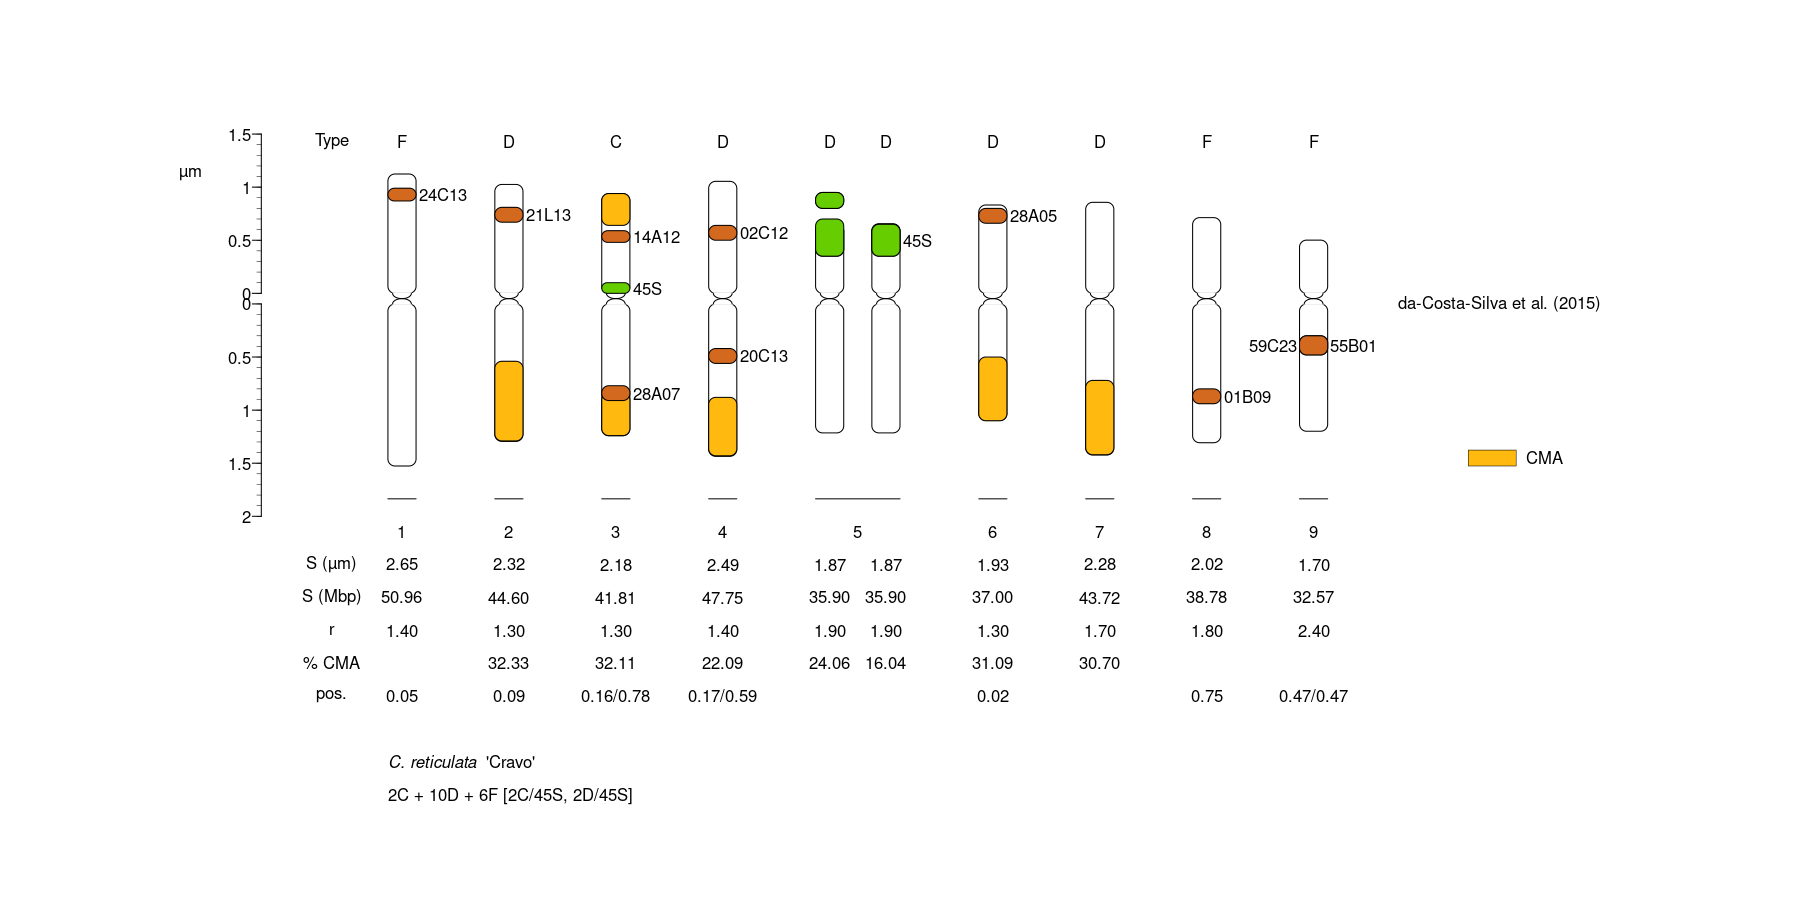

In [11]:
# notes to the left
reticulata <- "2C + 10D + 6F [2C/45S, 2D/45S]"

leftNotesdf<- data.frame(OTU=unique(citrusReticulata$OTU), note= reticulata )

# authors in notes (right side)
notesdf<- data.frame(OTU=unique(citrusReticulata$OTU), note="da-Costa-Silva et al. (2015)" )

par(mar=rep(0,4),oma=rep(0,4))

{
require(idiogramFISH)
options(repr.plot.width = 18, repr.plot.height = 9, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= citrusReticulata,         # chr. size data.frame
             dfMarkPos = citrusReticulataMarkPosDF,# mark position data.frame (inc. cen.)
             dfMarkColor=markStyleDF,# mark style d.f.
             
             orderChr = "original",  # order of chr. as in d.f.
             chrIdPatternRem="_.*",  # pattern to remove from chr. names
           
             chrColor= "white"       # color of chr.
             ,chrBorderColor="black" # borders
             
             ,chrIndex = "AR"        # add index r
             ,morpho=""              # don't add morphology cat.
             ,karIndex = FALSE       # don't add kar. indeex
             ,chrNameUp = TRUE       # add. info. of col. chrNameUp over kar.
             
             ,centromereSize = 0     # size of cen.
             ,colorBorderMark="black"# color of border of marks
             ,lwd.chr = 1            # border width
             
             ,OTUfont=3              # OTU name in italics
             
             ,leftNotes=leftNotesdf  # data.frame with notes
             ,notesTextSize = 1      # font size of notes
             ,leftNotesPosX = 0      # horizontal pos. of formula- left notes
             ,leftNotesPosY = 1.9    # y pos. of left notes
             
             ,notes = notesdf        # authors in notes (right)
             ,notesPosX = 1          # move right notes to right
           
             ,rulerInterval = .5     # ruler label int.
             ,ruler.tck = -.01       # ruler ticks
             ,rulerPos = -0.5        # ruler pos.
             ,xPosRulerTitle = 7     # move title (units) of ruler, beginning in 1st chr.
           
             ,ylimBotMod = 2         # modify ylim bottom argument
             ,ylimTopMod = 1         # modify ylim top argument
             ,xlimLeftMod = 1        # modify left xlim
             ,xlimRightMod = 2       # modify right xlim
             
             ,chromatids=FALSE       # do not plot chromatids
             ,squareness = 2         # corners rounded
             ,useMinorTicks = TRUE   # ruler minor ticks
             ,miniTickFactor = 5     # number of small ticks per big ticks
             ,distTextChr=.7         # distance indices to chr.
           
             ,chrId=""               # don't add chr. names (below)
             ,chrSize = TRUE         # add chr. size
             ,chrSizeMbp = TRUE      # add info of col. Mbp
             ,nsmall=2               # significative digits for indices
             
             ,markPer = "CMA"        # calculate % of chr. for this mark
             ,showMarkPos = TRUE     # show mark. position as fraction, under kar.
             ,bToRemove = c("CMA","45S","c45S")   # do not use these in showMarkPos
             
             ,legend = "inline"         # labels inline
             ,legendHeight = 1.5        # legend height (right)
             ,bannedMarkName = "CMA"    # do not add label of this mark
             ,bMarkNameAside=TRUE       # add banned mark aside
             ,forbiddenMark = "c45S"    # do not add this mark label
             
             ,groupSepar = 1.8       # separation among groups, see col. group (x chrSpacing)
             ,chrSpacing=.20         # separ. among chr.
             ,chrWidth = .20         # chr. width
             ,nameChrIndexPos = 4    # move name of indices to the left
)
)
}  

Download *Citrus* scripts from: [https://ferroao.gitlab.io/idiogramfishhelppages/citrushelp.R](https://ferroao.gitlab.io/idiogramfishhelppages/citrushelp.R){target="_blank"}

## Exploring *Citrus* functions

Published by Carvalho et al. [-@Carvalho2005]

*C. jambhiri/ C. volkameriana*
 
1B + 11D + 4F + 2F~L~^0^

### Create data.frame of chr. size


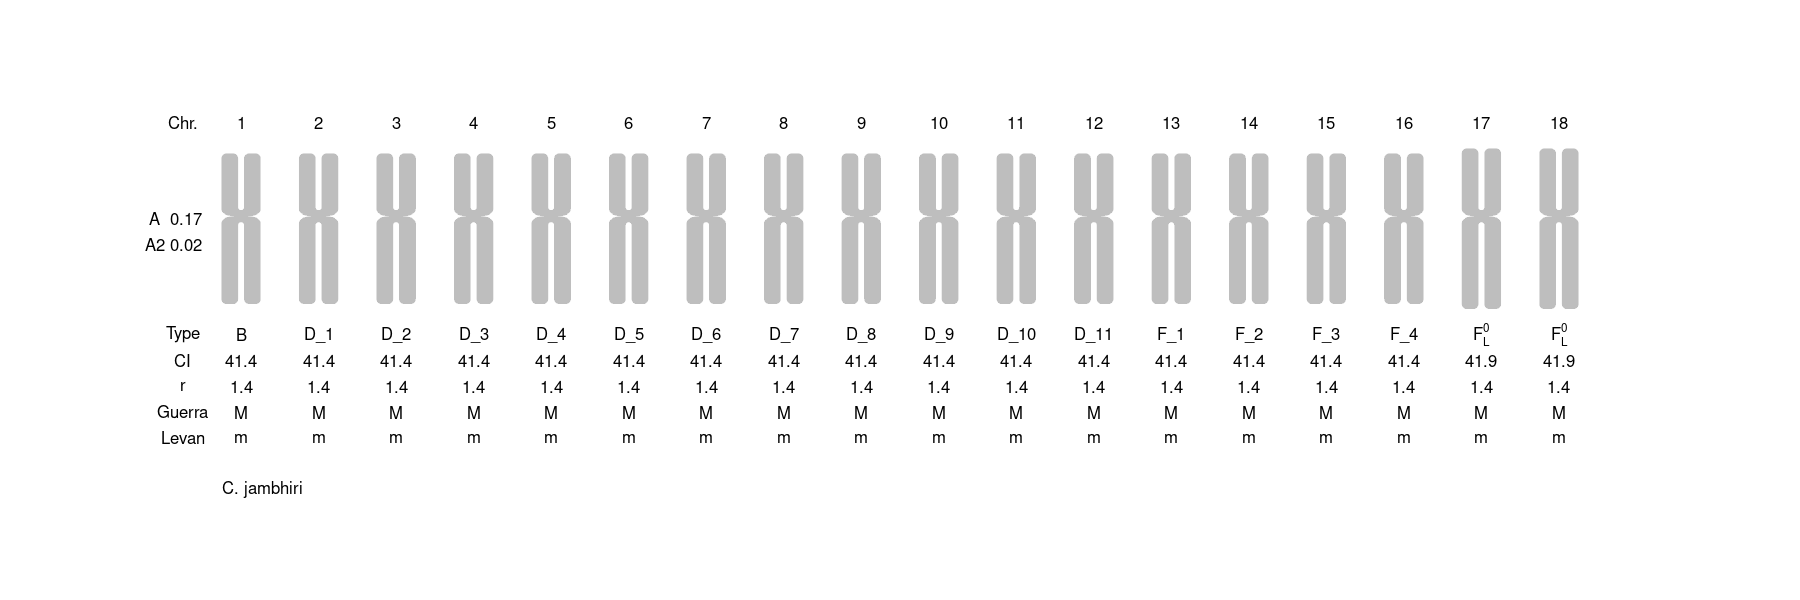

In [12]:
{
library(idiogramFISH)

citrusSizeDF <- citrusSize(B=1,D=11,F=4,FL0=2,
                           OTU="C. jambhiri")

# add simple secondary names
citrusSizeDF$chrNameUp <- 1:nrow(citrusSizeDF)

head(citrusSizeDF,3)
tail(citrusSizeDF,3)

# Editing data.frame:
# citrusSizeDF <- edit(citrusSizeDF)

# Initial plot, only sizes:
par(mar = rep(0,4),oma=rep(0,4) )
options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= citrusSizeDF,      # chr. size data.frame
              orderChr = "original",        # order of chr.
              ruler=FALSE,
              ylimBotMod = 2,               # modify bottom margin
              ylimTopMod = 1,
              
              chrNameUp = TRUE,             # use col. chrNameUp
              classChrName = "Type",        # change default title of inferior name
              classChrNameUp = "Chr."       # change default title of upper name
)
)
}

</div>

### Use the group column to define pairs {-}

<div class="fold s">

In [13]:
message("chr. names")
citrusSizeDF$chrName

#" "B" "D_1" "D_2" "D_3" "D_4" "D_5" "D_6" "D_7" "D_8"   "D_9"  "D_10"  "D_11"  "F_1"   "F_2"   "F_3"   "F_4"   "FL0_1" "FL0_2"
#   -------   ---------   ---------   ---------   -----------    ------------    -----------    ------------     ------------- 
#"     1          2           3           4            5              6              7               8                9

citrusSizeDF$group<-unlist(lapply(1:9, function(x) rep(x,2)) )
message("group column")
citrusSizeDF$group

# make secondary names
citrusSizeDF$chrNameUp <- unlist(lapply(1:9, function(x) rep(x,2)) )
citrusSizeDF$chrNameUp <- make.uniqueIF(citrusSizeDF$chrNameUp, sep="", letter=TRUE)

chr. names



[1] "B"     "D_1"   "D_2"   "D_3"   "D_4"   "D_5"   "D_6"   "D_7"   "D_8"  
[10] "D_9"   "D_10"  "D_11"  "F_1"   "F_2"   "F_3"   "F_4"   "FL0_1" "FL0_2"

group column



[1] 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9

### data.frame of marks' position


In [14]:

# CMA bands
citrusMarkPosDF <- citrusMarkPos(citrusSizeDF)
head(citrusMarkPosDF,3)
tail(citrusMarkPosDF,3)

,chrName,chrRegion,markName,markDistCen,markSize,OTU
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,B,p,CMA,0.00,0.35,C. jambhiri
2,B,q,CMA,1.35,0.35,C. jambhiri
3,D_1,q,CMA,1.35,0.35,C. jambhiri


,chrName,chrRegion,markName,markDistCen,markSize,OTU
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
11,D_7,q,CMA,1.35,0.35,C. jambhiri
12,D_8,q,CMA,1.35,0.35,C. jambhiri
13,D_9,q,CMA,1.35,0.35,C. jambhiri


In [15]:
# marks with overlap with CMA

# add mark of 45S rDNA in B, short arm (p)
citrusMarkPosDF45S <- markOverCMA(citrusMarkPosDF, # d.f. of CMA bands 
                                chrType="B",       # chr. of new mark
                                chrRegion="p",     # arm of new mark
                                markName="45S")    # name of mark

# add 45S in D (D_1) long arm
citrusMarkPosDF45S <- markOverCMA(citrusMarkPosDF45S, # d.f. including CMA bands
                                chrName="D_1", 
                                chrRegion="q", 
                                markName="45S")

# creating additional data.frames of marks (non-CMA overlap)

citrusMarkPosDF45S_D11 <- data.frame(chrName="D_11", # cr.
                                     chrRegion="q",  # arm
                                     markName="45S", 
                                     markDistCen=1,  # dist. to centrom.
                                     markSize=0.2,   # mark size
                                     OTU="C. jambhiri")

citrusMarkPosDF45S_F4  <- data.frame(chrName="F_4", 
                                     chrRegion="q",
                                     markName="45S",
                                     markDistCen=1, 
                                     markSize=0.2,
                                     OTU="C. jambhiri")

# fuse data.frames
citrusMarkPosDF45S <- dplyr::bind_rows(citrusMarkPosDF45S,     # CMA marks and overlapped
                                       citrusMarkPosDF45S_D11, # 45S in D (no overlap)
                                       citrusMarkPosDF45S_F4 ) # 45S in F (no overlap)


### data.frame of mark style 

In [16]:
# current marks
message("mark names")
unique(citrusMarkPosDF45S$markName)

markStyleDF   <- makedfMarkColorMycolors(
  unique(citrusMarkPosDF45S$markName), c("darkgoldenrod1","chartreuse3") )

# modify styles
markStyleDF$style<-c("square","dots")

mark names



[1] "CMA" "45S"

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



### Add karyotype formulas

In [46]:
notesdf <- data.frame(OTU=unique(citrusSizeDF$OTU), note="1B + 11D + 4F + 2FL0") # spacing matters

### Plot

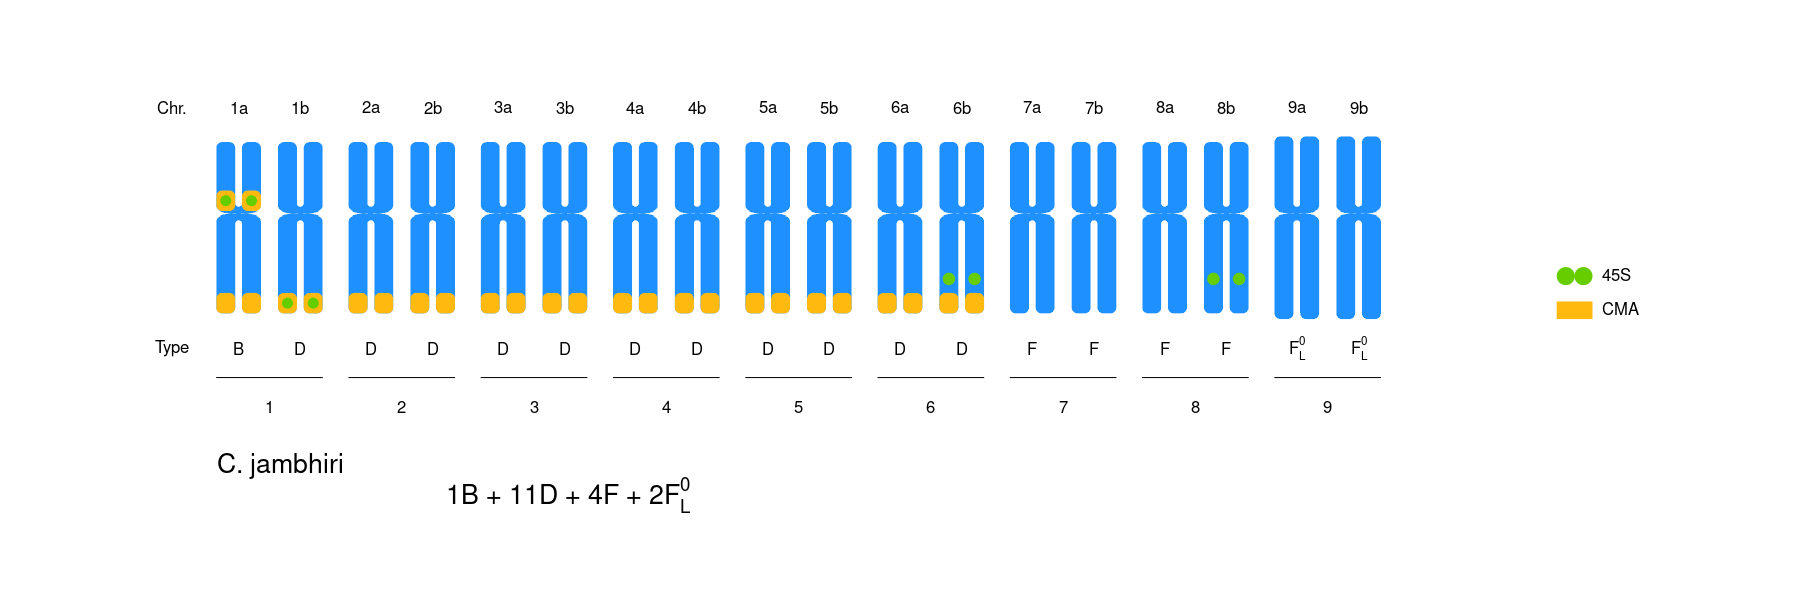

In [48]:
par(mar = rep(0,4),oma=rep(0,4) )
library(idiogramFISH)
options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= citrusSizeDF,      # chr. size data.frame
              dfMarkPos= citrusMarkPosDF45S,# mark position data.frame (inc. cen.)
              dfMarkColor=markStyleDF,      # mark style d.f.

              orderChr = "original",        # preserve order of chr. of d.f.
              
              # chrId = "",                 # remove name of chr.
              chrIdPatternRem="_.*",        # regex pattern for removal of names of chr.
              chrSpacing=0.2,               # separ. among chr.
              chrColor= "dodgerblue",
              
              chrNameUp = TRUE,             # use col. chrNameUp
              classChrName = "Type",        # change default title of inferior name
              classChrNameUp = "Chr."       # change default title of upper name
                            
              ,legendWidth = .8             # legend item width
              ,legendHeight = 3             # legend item height
              ,markLabelSpacer = 2          # legend spacer
              ,ruler=F                      # no ruler
              ,chrIndex = ""                # no chr. index
              ,morpho=""                    # no morpho.
              ,karIndex = FALSE             # no kar. ind.
              
              ,leftNotes=notesdf            # data.frame with notes
              ,leftNotesTextSize = 1.6      # font size of notes
              ,OTUTextSize = 1.6
              ,leftNotesPosX = 5.2          # pos. formula x axis
              ,leftNotesPosY = 0            # pos. formula y axis

              ,ylimBotMod = 1               # modify ylim bottom argument
              ,xlimRightMod = 4             # modify right xlim
)
)

## Representing only one chromosome per pair

As in the article [@Carvalho2005]

*C. jambhiri/ C. volkameriana*

1B + 11D + 4F + 2FL^0 

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



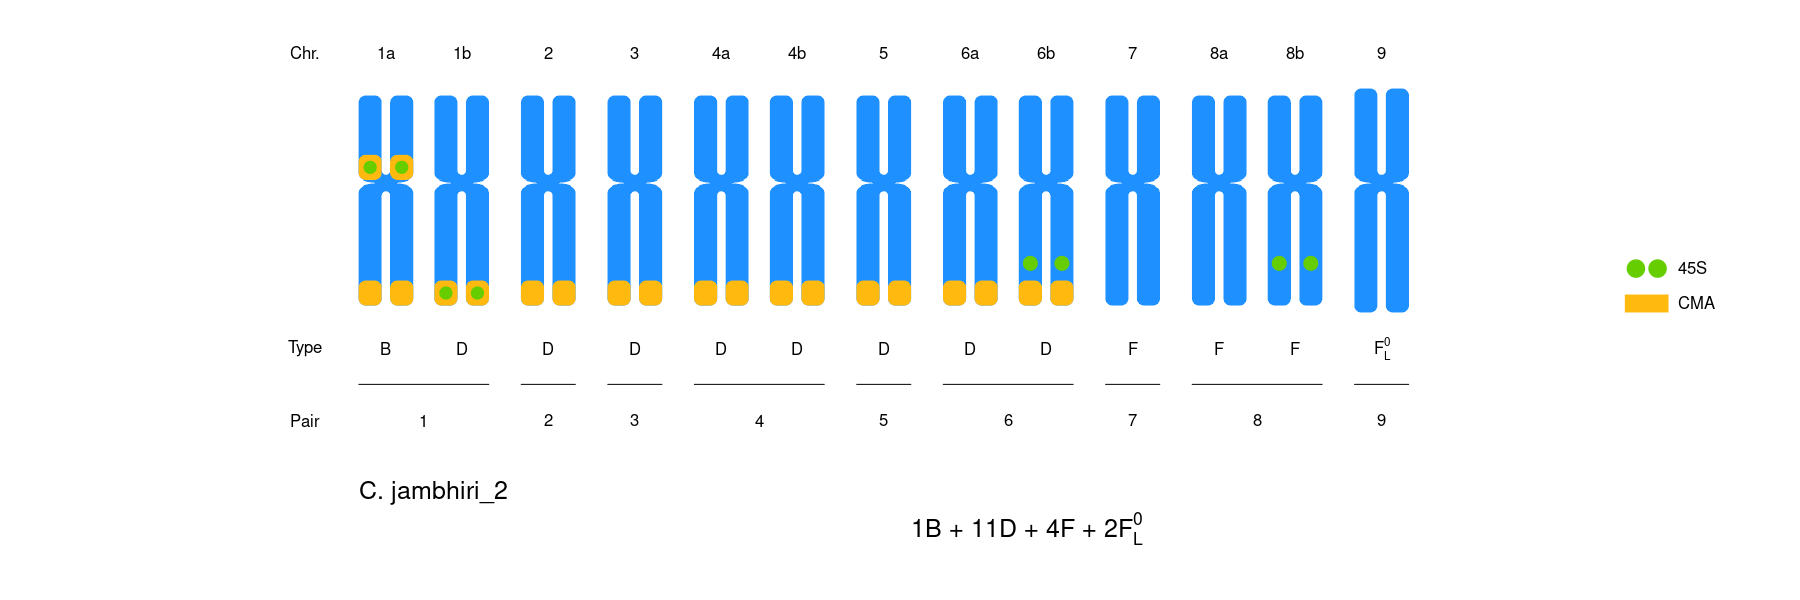

In [40]:
{
# data.frame of  chr. sizes
citrusSizeDF_2 <- citrusSize(B=1,D=8,F=3,FL0=1, # MODIFIED, SEE ABOVE
                           OTU="C. jambhiri_2")
head(citrusSizeDF_2)

# data.frame of CMA band pos.
citrusMarkPosDF_2 <- citrusMarkPos(citrusSizeDF_2)
head(citrusMarkPosDF_2)

# marks with overlap with CMA

# 45S in B, short arm
citrusMarkPosDF45S_2<-markOverCMA(citrusMarkPosDF_2, 
                                  chrType="B", 
                                  chrRegion="p", 
                                  markName="45S")

# 45S in D (D_1), long arm
citrusMarkPosDF45S_2<-markOverCMA(citrusMarkPosDF45S_2, 
                                  chrName="D_1", 
                                  chrRegion="q", 
                                  markName="45S")

# add mark from scratch (no overlap with CMA)

citrusMarkPosDF45S_D8  <- data.frame(chrName="D_8", # name of chr. 
                                     chrRegion="q", # arm
                                     markName="45S",# 
                                     markDistCen=1, # dist. to centrom.
                                     markSize=0.2,  # mark size
                                     OTU="C. jambhiri_2")

citrusMarkPosDF45S_F3  <- data.frame(chrName="F_3", 
                                     chrRegion="q",
                                     markName="45S",
                                     markDistCen=1, 
                                     markSize=0.2,
                                     OTU="C. jambhiri_2")
# fuse data.frames
citrusMarkPosDF45S_2 <- dplyr::bind_rows(citrusMarkPosDF45S_2,
                                         citrusMarkPosDF45S_D8,
                                         citrusMarkPosDF45S_F3 
                                         )

# current marks
unique(citrusMarkPosDF45S$markName)

# data.frame of mark style
markStyleDF   <- makedfMarkColorMycolors(
  unique(citrusMarkPosDF45S_2$markName), c("darkgoldenrod1","chartreuse3") )

# modify styles
markStyleDF$style<-c("square","dots")

# organize pairs, group

citrusSizeDF_2$chrName 
# "B"   "D_1"  "D_2" "D_3" "D_4" "D_5" "D_6" "D_7" "D_8" "F_1" "F_2" "F_3" "FL0"
#  ________    ____   ___   ________   ____   _________   ____   ________   ___
#     1          2     3       4         5        6         7        8       9

citrusSizeDF_2$group <- c(1,1,2,3,4,4,5,6,6,7,8,8,9) 

# add names over chr.
citrusSizeDF_2$chrNameUp <- citrusSizeDF_2$group
citrusSizeDF_2$chrNameUp <- make.uniqueIF(citrusSizeDF_2$chrNameUp, sep="", letter=TRUE)

# formula
notesdf <- data.frame(OTU=unique(citrusSizeDF_2$OTU), note="1B + 11D + 4F + 2FL0") # keep spacing
}

par(mar = c(0, 0, 0, 0), oma=rep(0,4) )
library(idiogramFISH)
options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= citrusSizeDF_2,      # d.f. of chr. size
              dfMarkPos= citrusMarkPosDF45S_2,# d.f. of mark pos
              dfMarkColor=markStyleDF,        # d.f. of mark style
              orderChr = "original",          # chr. order as in d.f.
              chrIdPatternRem = "_.*",        # modif name of chr. removing this pattern
              chrSpacing=.20,                 # separ. among chr.
              chrColor= "dodgerblue"

              ,legendWidth = .8            # legend item width
              ,legendHeight = 2.5          # legend item height
              ,markLabelSpacer = 2         # legend spacer
              ,ruler=F
              ,chrIndex = ""
              ,morpho=""
              ,karIndex = FALSE
              
              ,chrNameUp = TRUE           # use col. chrNameUp
              ,classChrName = "Type"      # change default title of inferior name
              ,classChrNameUp = "Chr."    # change default title of upper name
              ,classGroupName = "Pair"    # name for groups
              
              ,leftNotes=notesdf          # data.frame with notes
              ,notesTextSize = 1.3        # font size of notes
              ,leftNotesPosX = 10.2        # formula horiz. pos.
              ,leftNotesPosY = 0
              ,OTUTextSize = 1.5
              ,leftNotesTextSize = 1.5

              ,ylimBotMod = 1             # modify ylim bottom argument
              ,ylimTopMod = 0             # modify ylim top argument
              ,xlimLeftMod = 2            # modify left xlim
              ,xlimRightMod = 3           # modify right xlim
)
)

## Several karyotypes per plot

Column OTU is mandatory for several OTU.


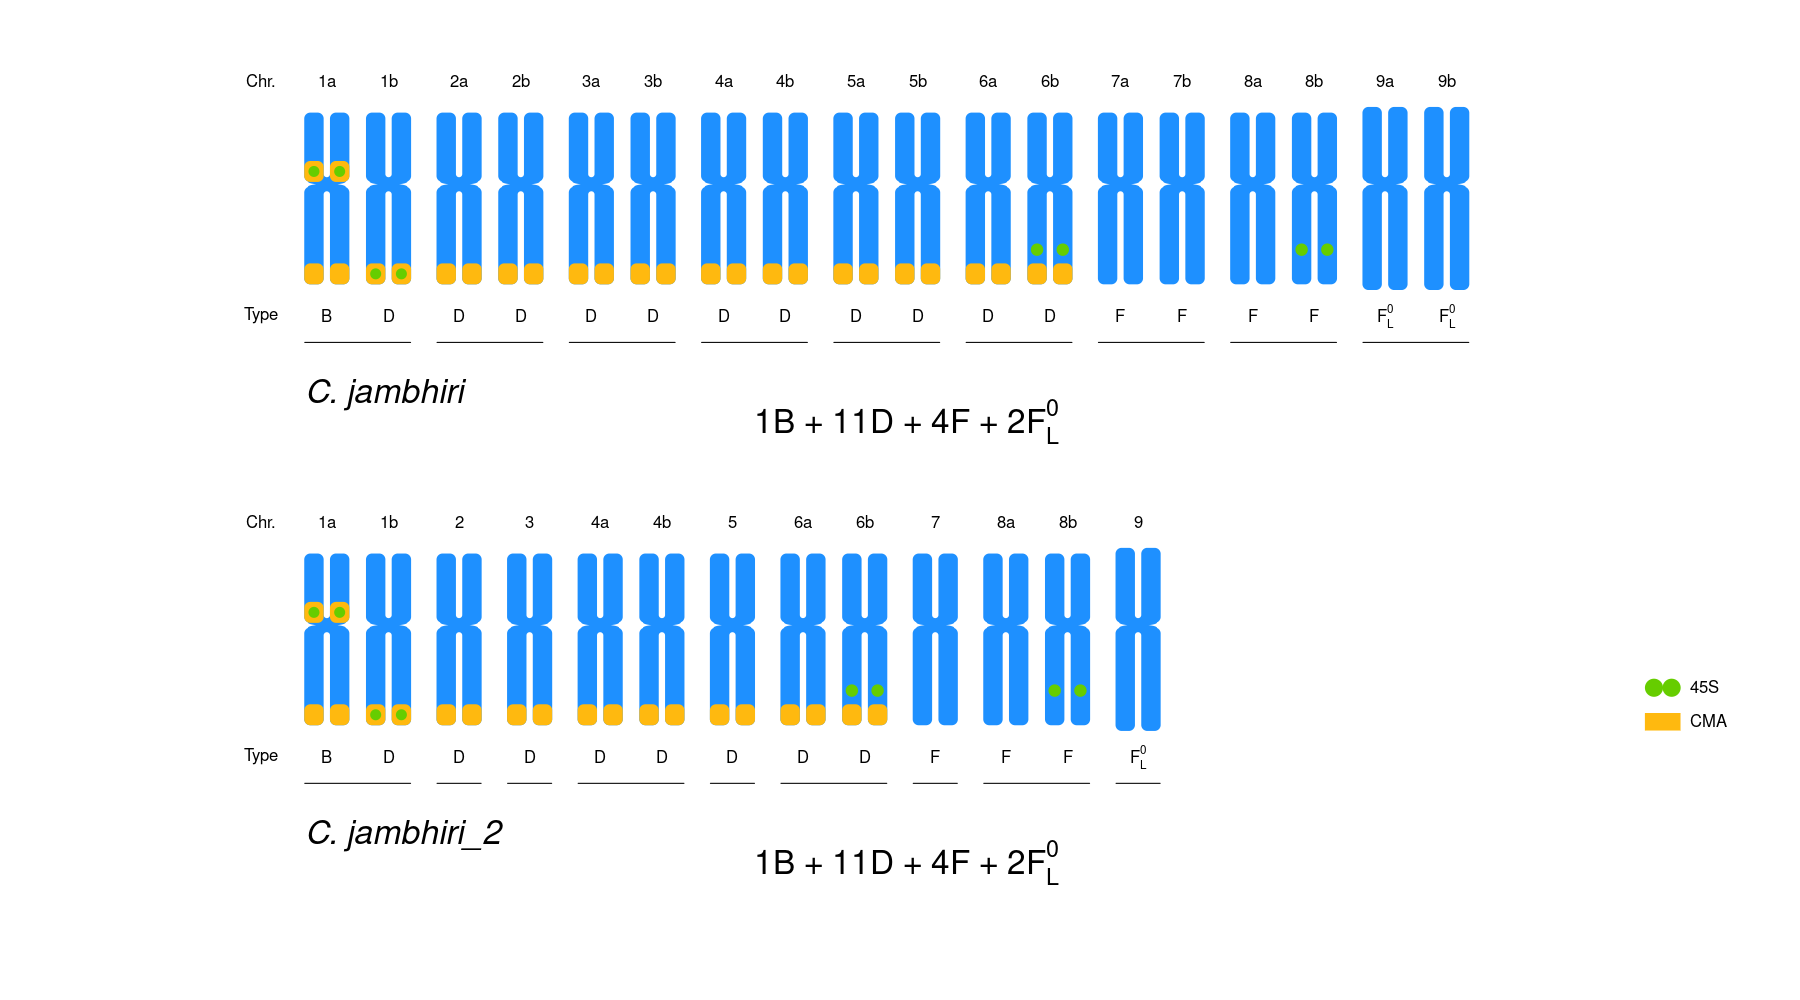

In [39]:

# data.frames of size - merge
bothSize    <-dplyr::bind_rows(citrusSizeDF, citrusSizeDF_2)

# data.frames of band pos. merge
bothMarkPos <-dplyr::bind_rows(citrusMarkPosDF45S, citrusMarkPosDF45S_2)

# formulas

notesdf<- data.frame(OTU=unique(bothSize$OTU), note="1B + 11D + 4F + 2FL0")

par(mar=rep(0,4),oma=rep(0,4))

options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= bothSize,    # chr. size data.frame
              dfMarkPos= bothMarkPos, # mark position data.frame (inc. cen.)
              dfMarkColor=markStyleDF,# mark style d.f.

              orderChr = "original",  # order of chr. as in d.f.
              chrIdPatternRem="_.*",  # pattern to remove from chr. names
              karHeight = 2,          # karyotype height
              karHeiSpace = 5,        # height + separ. among karyot.

              chrSpacing=.20,         # separ. among chr.
              chrColor= "dodgerblue" 
              ,distTextChr = .9       # distance text to chr.

              ,legendWidth = .8       # legend item width
              ,legendHeight = 3       # legend item height
              ,markLabelSpacer = 2    # legend spacer
              ,ruler=FALSE            
              ,chrIndex = ""
              ,morpho=""
              ,karIndex = FALSE
              #,colorBorderMark="black"# color of border of marks
              ,lwd.chr = 1            # border width
              
              ,chrNameUp = TRUE       # use col. chrNameUp
              ,classChrName = "Type"  # change default title of inferior name
              ,classChrNameUp = "Chr."# change default title of upper name
              ,groupName = FALSE      # don't show group names
              
              ,OTUfont=3              # OTU name in italics
              
              ,leftNotes=notesdf      # data.frame with notes
              ,notesTextSize = 1.3    # font size of notes
              ,leftNotesPosX = 10.2    # horizontal pos. of formula
              ,leftNotesPosY = 0
              ,leftNotesTextSize = 2
              ,OTUTextSize=2

              ,ylimBotMod = 1         # modify ylim bottom argument
              ,ylimTopMod = 0         # modify ylim top argument
              ,xlimLeftMod = 2        # modify left xlim
              ,xlimRightMod = 3       # modify right xlim
)
)

## *C. leiocarpa* as Yi et al. [-@Yi2018]


mark names:



[1] "CMA" "45S" "5S"

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



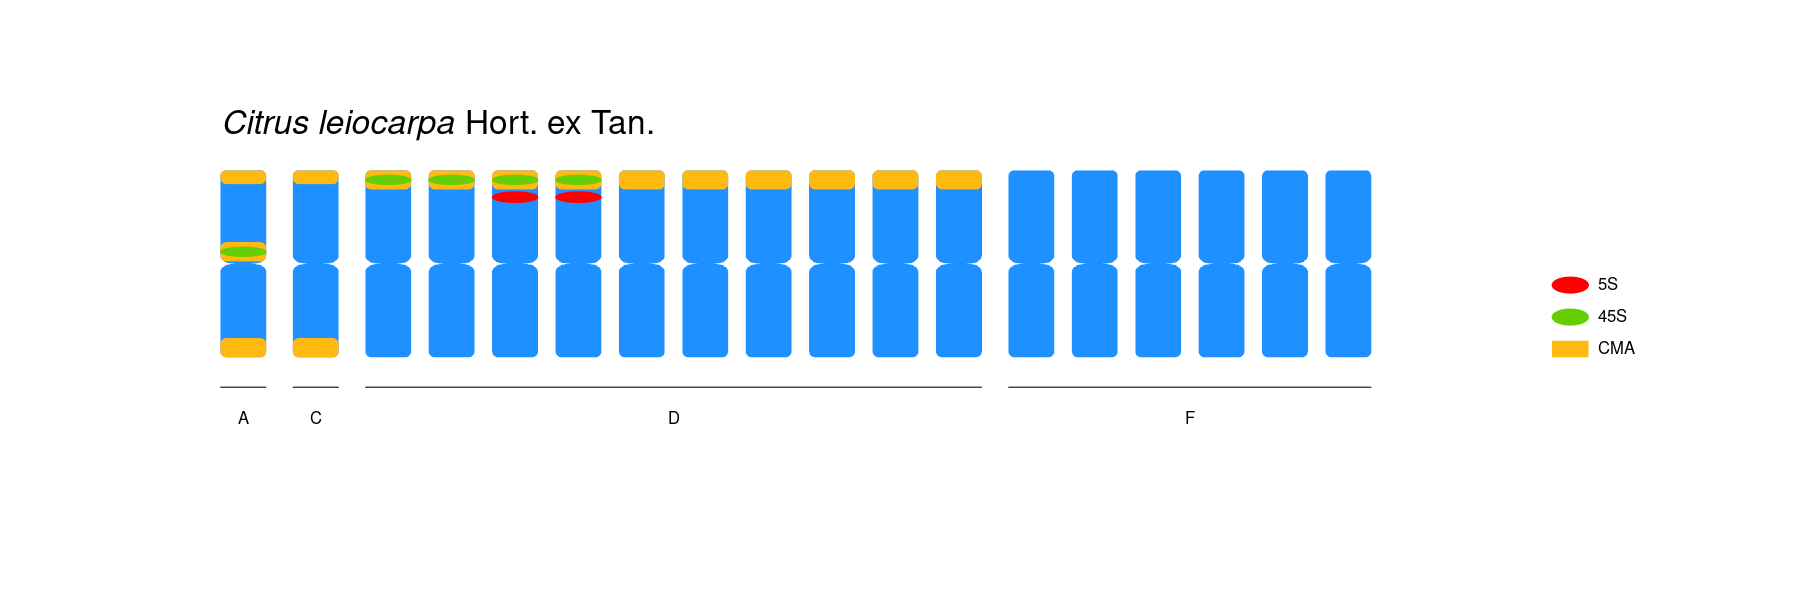

In [36]:

#
# create data.frame of chr.
#

cleiocarpaChr <- citrusSize(A=1,C=1,D=10,F=6, # Using Guerra nom.
                           OTU="C. leiocarpa",
                           shortArm=1.7
                           )

#
# add groups
#

cleiocarpaChr$group<-gsub("_.*","",cleiocarpaChr$chrName)

#
# marks data.frame
#

# CMA
cleiocarpaMarks <- citrusMarkPos(cleiocarpaChr)

# marks with overlap with CMA

# add mark of 45S rDNA in A, short arm (p)
cleiocarpaMarks <- markOverCMA(cleiocarpaMarks, # d.f. of CMA bands 
                               chrType="A",       # chr. of new mark
                               chrRegion="p",     # arm of new mark
                               markName="45S",    # name of mark
                               shrinkMark=TRUE
                               )    
# add 45S in Ds
cleiocarpaMarks <-  markOverCMA(cleiocarpaMarks, # d.f. including CMA bands
                                chrName=paste0("D_",1:4), 
                                chrRegion="q", 
                                markName="45S",
                                shrinkMark=TRUE
                                )

# creating additional data.frames of marks (non-CMA overlap)

cleiocarpaMarks_D3 <- data.frame(chrName = c("D_3", "D_4"), # chr.
                                 chrRegion = "q",           # arm
                                 markName = "5S", 
                                 markDistCen = 1.1,         # dist. to centrom.
                                 markSize = 0.2,            # mark size
                                 OTU="C. leiocarpa")

#
# merge marks d.fs
#

cleiocarpaMarks <- dplyr::bind_rows(cleiocarpaMarks,    # CMA marks and overlapped 45S
                                    cleiocarpaMarks_D3, # 5S in D (no overlap)
                                    )
#
# mark style data.frame
#

# current marks
message("mark names:")
unique(cleiocarpaMarks$markName)

markStyleDF   <- makedfMarkColorMycolors(
  unique(cleiocarpaMarks$markName), c("darkgoldenrod1","chartreuse3","red") 
  )

# modify styles
markStyleDF$style<-c("square","dots","dots")

#
# swap chromosome arms of Ds (CMA marks originally in long arm)
#

dflist<-swapChrRegionDfSizeAndMarks(cleiocarpaChr,
                            cleiocarpaMarks,
                            paste0("D_",1:10)
                            )
cleiocarpaChr   <-dflist$dfChrSize
cleiocarpaMarks <-dflist$dfMarkPos

#
# Left notes Up data.frame
#

notesdf<- data.frame(OTU=unique(cleiocarpaChr$OTU), 
                     note= "italic('Citrus leiocarpa'),' Hort. ex Tan.' " # use with parseStr2lang
                     ) 

par(mar = rep(0,4),oma=rep(0,4) )

options(repr.plot.width = 18, repr.plot.height = 6, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= cleiocarpaChr,     # chr. size data.frame
              dfMarkPos= cleiocarpaMarks,   # mark position data.frame 
              dfMarkColor=markStyleDF,      # mark style d.f.

              orderChr = "original",        # preserve order of chr. of d.f.
              chrId="",                     # do not add chr. names
              
              addOTUName = FALSE,           # remove name of OTU
              chrIdPatternRem="_.*",        # regex pattern for removal of names of chr.
              chrSpacing=0.2,               # separ. among chr.
              chrColor= "dodgerblue",       # chr. color
              chromatids=FALSE,             # do not use separ. chromatids
                        
              dotsAsOval = TRUE             # use oval shape instead of dots marks
              ,legendWidth = .8             # legend item width
              ,legendHeight = 3             # legend item height
              ,markLabelSpacer = 2          # legend spacer
              ,ruler=F                      # no ruler
              ,chrIndex = ""                # no chr. index
              ,morpho=""                    # no morpho.
              ,karIndex = FALSE             # no kar. ind.
              
              ,leftNotesUp=notesdf          # data.frame with notes
              ,leftNotesUpTextSize=2
              
              ,parseStr2lang = TRUE         # use italics, see notesdf above
              ,notesTextSize = 1.3          # font size of notes
              ,leftNotesUpPosX = 0          # pos. left notes x axis
              ,leftNotesUpPosY = 1          # pos. left notes y axis

              ,ylimBotMod = 0               # modify ylim bottom argument
              ,xlimRightMod = 4             # modify right xlim
)
)


</div>

## *Citrus limon* origin

With data from da-Costa-Silva et al. [-@DaCostaSilva2015], Mendes et al. [-@Mendes2016] and Carvalho et al. [-@Carvalho2005]

### *Citrus reticulata*

data.frame of chr. sizes

<div class="fold s">

In [22]:

# c. reticulata ----X---- c. aurantium
#                   |
#                c. limon


# c. reticulata

#
#   chr. size - arms in pixels
#

{
citrusReticulata<-read.table(text="
chrName shortArmSize longArmSize totalTrue
f 67 91  2.65
d 61 77  2.32
c 59 78  2.18
d 61 83  2.49
d 34 63  1.87
d 50 66  1.93
d 50 83  2.28
f 42 77  2.02
f 28 67  1.70", header =T)

citrusReticulata$pseudototal <- citrusReticulata$shortArmSize+citrusReticulata$longArmSize

# pixel to micrometers
citrusReticulata$shortArmSize<- citrusReticulata$shortArmSize/(citrusReticulata$pseudototal/citrusReticulata$totalTrue)
citrusReticulata$longArmSize <- citrusReticulata$longArmSize /(citrusReticulata$pseudototal/citrusReticulata$totalTrue)

citrusReticulata$chrName<-toupper(citrusReticulata$chrName)
citrusReticulata$chrName<-make.uniqueIF(citrusReticulata$chrName)
citrusReticulata$OTU<-"C. reticulata 'Cravo'"

}

</div>

Sort chromosomes

<div class="fold s">

In [23]:

# sort chr. by name
citrusReticulata<-citrusReticulata[order(citrusReticulata$chrName),]

# sort Ds by size
Ds<-citrusReticulata[which( citrusReticulata$chrName %in% grep("D", citrusReticulata$chrName, value=T) 
                            ),]
citrusReticulata[which( citrusReticulata$chrName %in% grep("D", citrusReticulata$chrName, value=T) 
                        ),] <- Ds[order(Ds$shortArmSize+Ds$longArmSize),]

# sort Fs by size
Fs<-citrusReticulata[which( citrusReticulata$chrName %in% grep("F", citrusReticulata$chrName, value=T) 
),]

citrusReticulata[which( citrusReticulata$chrName %in% grep("F", citrusReticulata$chrName, value=T) ),] <- 
  Fs[order(Fs$shortArmSize + Fs$longArmSize),]

# add group column to show that each one is a pair
citrusReticulata$group<-1:9

</div>

data.frame of bands

<div class="fold s">

In [24]:

#
# c. reticulata bands
#

{
citrusReticulataMarkPosDF <- citrusMarkPos(citrusReticulata)

  # remove CMA terminal from D
  citrusReticulataMarkPosDF <- citrusReticulataMarkPosDF[-which(citrusReticulataMarkPosDF$chrName=="D_3" & 
                                                              citrusReticulataMarkPosDF$markName=="CMA" 
                                                              ),]
  
  # add marks in short arm of D
  
  Sr_D_3<-citrusReticulata[which(citrusReticulata$chrName=="D_3"),]$shortArmSize
  #45S
  citrusReticulataMarkPosDF_D45S  <- data.frame(chrName="D_3", 
                                               chrRegion="p",
                                               markName="45S",
                                               markDistCen=Sr_D_3- (.15+.15/2), 
                                               markSize=0.15,
                                               OTU=unique(citrusReticulata$OTU)
  )
  
  # CMA 
  citrusReticulataMarkPosDF_DCMA  <- data.frame(chrName="D_3", 
                                               chrRegion="p",
                                               markName="CMA",
                                               markDistCen=Sr_D_3-.3, 
                                               markSize=0.3,
                                               OTU=unique(citrusReticulata$OTU)
  )
  
  # add 45S rDNA mark in short arm  of C
  citrusReticulataMarkPosDF_C45S  <- data.frame(chrName="C", 
                                                chrRegion="p",
                                                markName="45S",
                                                markDistCen=0, 
                                                markSize=0.1,
                                                OTU=unique(citrusReticulata$OTU)
  )
  
  # fuse marks
  citrusReticulataMarkPosDF <- dplyr::bind_rows(citrusReticulataMarkPosDF,
                                               citrusReticulataMarkPosDF_D45S,
                                               citrusReticulataMarkPosDF_DCMA,
                                               citrusReticulataMarkPosDF_C45S
  )
  
  # change band sizes
  
  # D_1
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_1"),]$markSize<-.75
  LAD_1<-citrusReticulata[which(citrusReticulata$chrName=="D_1"),]$longArmSize
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_1"),]$markDistCen<-
  LAD_1-.75
  
  # C short arm
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="C" &
                                    citrusReticulataMarkPosDF$markName=="CMA" &
                                    citrusReticulataMarkPosDF$chrRegion=="p"),]$markSize<-.3
  
  SAC <- citrusReticulata[which(citrusReticulata$chrName=="C" ),]$shortArmSize
  
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="C" &
                                    citrusReticulataMarkPosDF$markName=="CMA" &
                                    citrusReticulataMarkPosDF$chrRegion=="p"
                                    ),]$markDistCen<-SAC-.3
  
  # C LONG ARM
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="C" &
                                    citrusReticulataMarkPosDF$markName=="CMA" &
                                    citrusReticulataMarkPosDF$chrRegion=="q"),]$markSize<-.4
   
  LAC <- citrusReticulata[which(citrusReticulata$chrName=="C" ),]$longArmSize
  
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="C" &
                                    citrusReticulataMarkPosDF$markName=="CMA" &
                                    citrusReticulataMarkPosDF$chrRegion=="q"
  ),]$markDistCen<- LAC-.4
  
  
  # D_2
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_2"),]$markSize<-.55
  LAD_2<-citrusReticulata[which(citrusReticulata$chrName=="D_2"),]$longArmSize
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_2"),]$markDistCen<-
    LAD_2-.55
  
  # D_4
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_4"),]$markSize<-.6
  LAD_4<-citrusReticulata[which(citrusReticulata$chrName=="D_4"),]$longArmSize
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_4"),]$markDistCen<-
    LAD_4-.6
  
  # D_5
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_5"),]$markSize<-.7
  LAD_5<-citrusReticulata[which(citrusReticulata$chrName=="D_5"),]$longArmSize
  citrusReticulataMarkPosDF[which(citrusReticulataMarkPosDF$chrName=="D_5"),]$markDistCen<-
    LAD_5-.7
}

</div>

### *C. aurantium* 'common' 

data.frame of chr. sizes

<div class="fold s">

In [25]:

# From Mendes et al. 2016
 
# 1a + 1b + 1C + 8D + 7F

{
  
  #
  # chr .sizes
  #
  
  citrusaurantium<-read.table(text="
chrName shortArmSize longArmSize
f	1.43333333333333	2.06666666666667
f	1.36666666666667	1.83333333333333
d	1.3	1.66666666666667
d	1.13333333333333	1.46666666666667
d	1	1.6
a	1.3	2
d	1.36666666666667	1.8
d	1.06666666666667	1.63333333333333
d	0.733333333333333	1.36666666666667
f	0.833333333333333	1.36666666666667
d	1.13333333333333	1.33333333333333
c	1.16666666666667	1.66666666666667
d	1.06666666666667	1.8
b	1	1.83333333333333
f	0.966666666666667	1.6
f	0.8	1.36666666666667
f	0.633333333333333	1.43333333333333
f	0.733333333333333	1.3
", header =TRUE)
  
  # modify chr. names
  citrusaurantium$chrName<-toupper(citrusaurantium$chrName)
  citrusaurantium$chrName<-make.uniqueIF(citrusaurantium$chrName)
  
  # add column
  citrusaurantium$OTU<-"C. aurantium 'common'"
  
}
  

</div>

Order pairs based in BAC markers (not shown here - different to 45S / 5S rDNA )

<div class="fold s">

In [26]:
  
{
  # confirmed pairs
  customOrder<-c("A","D_3","C","D_7")
  
  customOrder<-c(customOrder,sort(setdiff(citrusaurantium$chrName,customOrder)) )
  
  # sort 
  citrusaurantium$chrName<-factor(citrusaurantium$chrName, levels=customOrder)
  citrusaurantium<-citrusaurantium[order(citrusaurantium$chrName),]
  
  
  # sort Ds by size
  
  Ds<-citrusaurantium[which( citrusaurantium$chrName %in% grep("D", citrusaurantium$chrName, value=T) &
                               !citrusaurantium$chrName %in% c("D_3","D_7") ),]
  citrusaurantium[which( citrusaurantium$chrName %in% grep("D", citrusaurantium$chrName, value=T) &
                           !citrusaurantium$chrName %in% c("D_3","D_7") ),] <- Ds[order(Ds$shortArmSize+Ds$longArmSize),]
  
  # sort Fs by size
  Fs<-citrusaurantium[which( citrusaurantium$chrName %in% grep("F", citrusaurantium$chrName, value=T) 
  ),]
  citrusaurantium[which( citrusaurantium$chrName %in% grep("F", citrusaurantium$chrName, value=T) ),] <- 
    Fs[order(Fs$shortArmSize + Fs$longArmSize),]
  
  # pairs:
  
  groups<-c(1,1,2,2)
  citrusaurantium$group<-c(groups,rep(NA,18-length(groups) ) )
  
  # secondary name
  citrusaurantium$chrNameUp<-1:18
  
}


</div>

data.frame of bands 

Option 1. Write from scratch:

<div class="fold s">

In [27]:
{
  citrusaurantiumMarkPosDF<-read.table(text="
  chrName chrRegion markName markDistCen markSize    
  A           p      CMA   0.73    0.570 
  A           p      CMA   0.00    0.350 
  A           q      CMA   1.23    0.770 
  B           p      CMA   0.00    0.350 
  B           q      CMA   0.86    0.970 
  C           p      CMA   0.74    0.430 
  C           q      CMA   1.07    0.600 
  D_1         q      CMA   0.60    1.070 
  D_2         q      CMA   0.84    0.630 
  D_3         q      CMA   1.07    0.530 
  D_4         q      CMA   1.07    0.730 
  D_5         q      CMA   0.86    0.770 
  D_7         q      CMA   0.46    0.870 
  D_8         q      CMA   0.90    0.900 
  B           p      45S   0.09    0.175 
  A           p      45S   0.09    0.175 
  D_6         p      45S   0.58    0.100 
  D_6         p      CMA   0.53    0.200
  ",header=TRUE) 
  
citrusaurantiumMarkPosDF$OTU<-"C. aurantium 'common'"
}
# this is equivalent to the following section

</div>

Option 2. Use functions:

<div class="fold s">

In [28]:
{
  
#
# CMA bands
#
  citrusaurantiumMarkPosDF <- citrusMarkPos(citrusaurantium)

  # add 45S in B
  citrusaurantiumMarkPosDF<-markOverCMA(citrusaurantiumMarkPosDF, 
                                        chrType = "B", 
                                        chrRegion = "p", 
                                        markName = "45S")
  
  # add 45S in A p prox
  citrusaurantiumMarkPosDF<-markOverCMA(citrusaurantiumMarkPosDF, 
                                        chrType = "A", 
                                        chrRegion = "p", 
                                        markName = "45S")
  
  
  # D_6
  
  # change D (D_6) band from long to short
  SA_D_6<-citrusaurantium[which(citrusaurantium$chrName=="D_6"),]$shortArmSize
  
  # 45S in short
  citrusaurantiumMarkPosDF_D45S  <- data.frame(chrName = "D_6", 
                                               chrRegion = "p",
                                               markName = "45S",
                                               markDistCen = SA_D_6 - 0.15, 
                                               markSize = 0.1,
                                               OTU = unique(citrusaurantium$OTU)
  )
  
  # CMA in short
  citrusaurantiumMarkPosDF_DCMA  <- data.frame(chrName = "D_6", 
                                               chrRegion = "p",
                                               markName = "CMA",
                                               markDistCen = SA_D_6 - 0.2, 
                                               markSize = 0.2,
                                               OTU = unique(citrusaurantium$OTU)
  )
  
  # remove CMA terminal from D_6 long
  citrusaurantiumMarkPosDF<-citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName! = "D_6"),]
  
  # change mark sizes according to publication
  
  # D_1 band
  
  # change mark size
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_1"),]$markSize<-1.07
  
  # arm size
  LAD_1<-citrusaurantium[which(citrusaurantium$chrName=="D_1"),]$longArmSize
  
  # change mark dist. to cen.
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_1"),]$markDistCen<-
    LAD_1-1.07
  
  # D_2
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_2"),]$markSize<-0.63
  LAD_2<-citrusaurantium[which(citrusaurantium$chrName=="D_2"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_2"),]$markDistCen<-
    LAD_2-.63

  # D_3
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_3"),]$markSize<-0.53
  LAD_3<-citrusaurantium[which(citrusaurantium$chrName=="D_3"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_3"),]$markDistCen<-
    LAD_3-.53

  # A p ter
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="A" &
                                   citrusaurantiumMarkPosDF$markDistCen==1.05),]$markSize<-0.57
  SAA<-citrusaurantium[which(citrusaurantium$chrName=="A"),]$shortArmSize
  
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="A"&
                                   citrusaurantiumMarkPosDF$markDistCen==1.05),]$markDistCen<-
  SAA-.57
  
  # A q
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="A" &
                                   citrusaurantiumMarkPosDF$chrRegion=="q"),]$markSize<-0.77
  LAA<-citrusaurantium[which(citrusaurantium$chrName=="A"),]$longArmSize
  
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="A"&
                                   citrusaurantiumMarkPosDF$chrRegion=="q"),]$markDistCen<-
    LAA-.77
  
  # D_4
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_4"),]$markSize<-0.73
  LAD_4<-citrusaurantium[which(citrusaurantium$chrName=="D_4"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_4"),]$markDistCen<-
    LAD_4-.73

  # D_5
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_5"),]$markSize<-0.77
  LAD_5<-citrusaurantium[which(citrusaurantium$chrName=="D_5"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_5"),]$markDistCen<-
    LAD_5-.77

  # D_7
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_7"),]$markSize<-0.87
  LAD_7<-citrusaurantium[which(citrusaurantium$chrName=="D_7"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_7"),]$markDistCen<-
    LAD_7-.87

  # C p
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="C" &
                                   citrusaurantiumMarkPosDF$chrRegion=="p"),]$markSize<-.43
  SAC<-citrusaurantium[which(citrusaurantium$chrName=="C"),]$shortArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="C" &
                                   citrusaurantiumMarkPosDF$chrRegion=="p"),]$markDistCen<-
    SAC-.43
  
  # C q
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="C" &
                                   citrusaurantiumMarkPosDF$chrRegion=="q"),]$markSize<-.6
  LAC<-citrusaurantium[which(citrusaurantium$chrName=="C"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="C" &
                                   citrusaurantiumMarkPosDF$chrRegion=="q"),]$markDistCen<-
    LAC-.6

  # D_8
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_8"),]$markSize<-0.9
  LAD_8<-citrusaurantium[which(citrusaurantium$chrName=="D_8"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="D_8"),]$markDistCen<-
    LAD_8-.9

  # B q
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="B" &
                                   citrusaurantiumMarkPosDF$chrRegion=="q"),]$markSize<-.97
  LAB<-citrusaurantium[which(citrusaurantium$chrName=="B"),]$longArmSize
  citrusaurantiumMarkPosDF[which(citrusaurantiumMarkPosDF$chrName=="B" &
                                   citrusaurantiumMarkPosDF$chrRegion=="q"),]$markDistCen<-
    LAB-.97
  
  # fuse marks
  citrusaurantiumMarkPosDF <- dplyr::bind_rows(citrusaurantiumMarkPosDF,
                                               citrusaurantiumMarkPosDF_D45S,
                                               citrusaurantiumMarkPosDF_DCMA
  )
}

</div>

### *C. limon*

<div class="fold s">

In [29]:

# from: Carvalho 2005

# C. limon - 1B(45Sprox) + 1C + 8D + 1D(45S) + 5F + 1FL0 + 1FL+

{
    # data.frame of  chr. sizes
    
  citruslimon <- citrusSize(B = 1,C = 1,D = 9, F = 5, FL0 = 1, FL = 1, 
                                 OTU = "C. limon")
  citruslimon
  
  # modify sizes
  
  citruslimon$shortArmSize[3]<-1.1
  citruslimon$longArmSize[3]<-1.5
  
  citruslimon$shortArmSize[4:5]<-1.15
  citruslimon$longArmSize[4:5]<-1.6
  
  citruslimon$shortArmSize[6:7]<-1.1
  citruslimon$longArmSize[6:7]<-1.6
  
  citruslimon$shortArmSize[8:9]<-1.15
  citruslimon$longArmSize[8:9]<-1.65
  
  citruslimon$shortArmSize[2]<-1
  citruslimon$longArmSize[2]<-1.6
  
  citruslimon$shortArmSize[12]<-1
  citruslimon$longArmSize[12]<-1.5
  
  citruslimon$shortArmSize[10:11]<-.95
  citruslimon$longArmSize[10:11]<-1.4
  
  citruslimon$shortArmSize[13:14]<-1
  citruslimon$longArmSize[13:14]<-1.5
  
  citruslimon$shortArmSize[15:16]<-.95
  citruslimon$longArmSize[15:16]<-1.3
  
  # sort Ds by size
  
  Ds<-citruslimon[which( citruslimon$chrName %in% grep("D", citruslimon$chrName, value=T) 
  ),]
  
  citruslimon[which( citruslimon$chrName %in% grep("D", citruslimon$chrName, value=T) 
  ),] <- Ds[order(Ds$shortArmSize+Ds$longArmSize),]
  
  # sort Fs by size
  Fs<-citruslimon[which( citruslimon$chrName %in% grep("F", citruslimon$chrName, value=T) 
  ),]
  
  citruslimon[which( citruslimon$chrName %in% grep("F", citruslimon$chrName, value=T) ),] <- 
    Fs[order(Fs$shortArmSize + Fs$longArmSize),]
  
  
  # secondary chr. name
  citruslimon$chrNameUp<-1:18
  
  #
  # data.frame of CMA band pos.
  #
  
  citruslimonMarkPosDF <- citrusMarkPos(citruslimon)
  head(citruslimonMarkPosDF)
  
  # marks with overlap with CMA
  # 45S in B, short arm
  
  citruslimonMarkPosDF<-markOverCMA(citruslimonMarkPosDF, 
                                    chrType="B", 
                                    chrRegion="p", 
                                    markName="45S")
  
  # 45S in D (D_1), long arm
  citruslimonMarkPosDF<-markOverCMA(citruslimonMarkPosDF, 
                                    chrName="D_1", 
                                      chrRegion="q", 
                                      markName="45S")
    
    # add mark from scratch (no overlap with CMA)
    
  }

</div>

### Merge data.frames from all OTUs

<div class="fold s">

In [30]:

#
# data.frames of size - merge
#

threeSize    <-dplyr::bind_rows(citrusReticulata, citruslimon, citrusaurantium)

#
# data.frames of band pos. merge
#

threeMarkPos <-dplyr::bind_rows(citruslimonMarkPosDF, citrusaurantiumMarkPosDF, citrusReticulataMarkPosDF)


#
#   leftNotes with formulas
#

# formulas
limon      <- "1B + 1C + 9D + 5F + 1FL0 + 1FL+ [1B/45S, 1D/45S]"
aurantium  <- "1A + 1B + 1C + 8D + 7F [1A/45S,1B/45S,1D/45S]"
reticulata <- "2C + 10D + 6F [2C/45S, 2D/45S]"

leftNotesdf<- data.frame(OTU=unique(threeSize$OTU), note=c(reticulata, limon, aurantium) )

# authors
notesdf<- data.frame(OTU=unique(threeSize$OTU), note=c("da-Costa-Silva et al. (2015)","Carvalho et al. (2005)","Mendes et al. (in prep.)") )

# marks' style data.frame

markStyleDF   <- makedfMarkColorMycolors(
  unique(citrusReticulataMarkPosDF$markName), c("darkgoldenrod1","chartreuse3") 
)

markStyleDF$style<-c("square","dots")

By default 5S are plotted as dots, to change this behavior make your own dfMarkColor data.frame



</div>

### Plot

<div class="fold s">

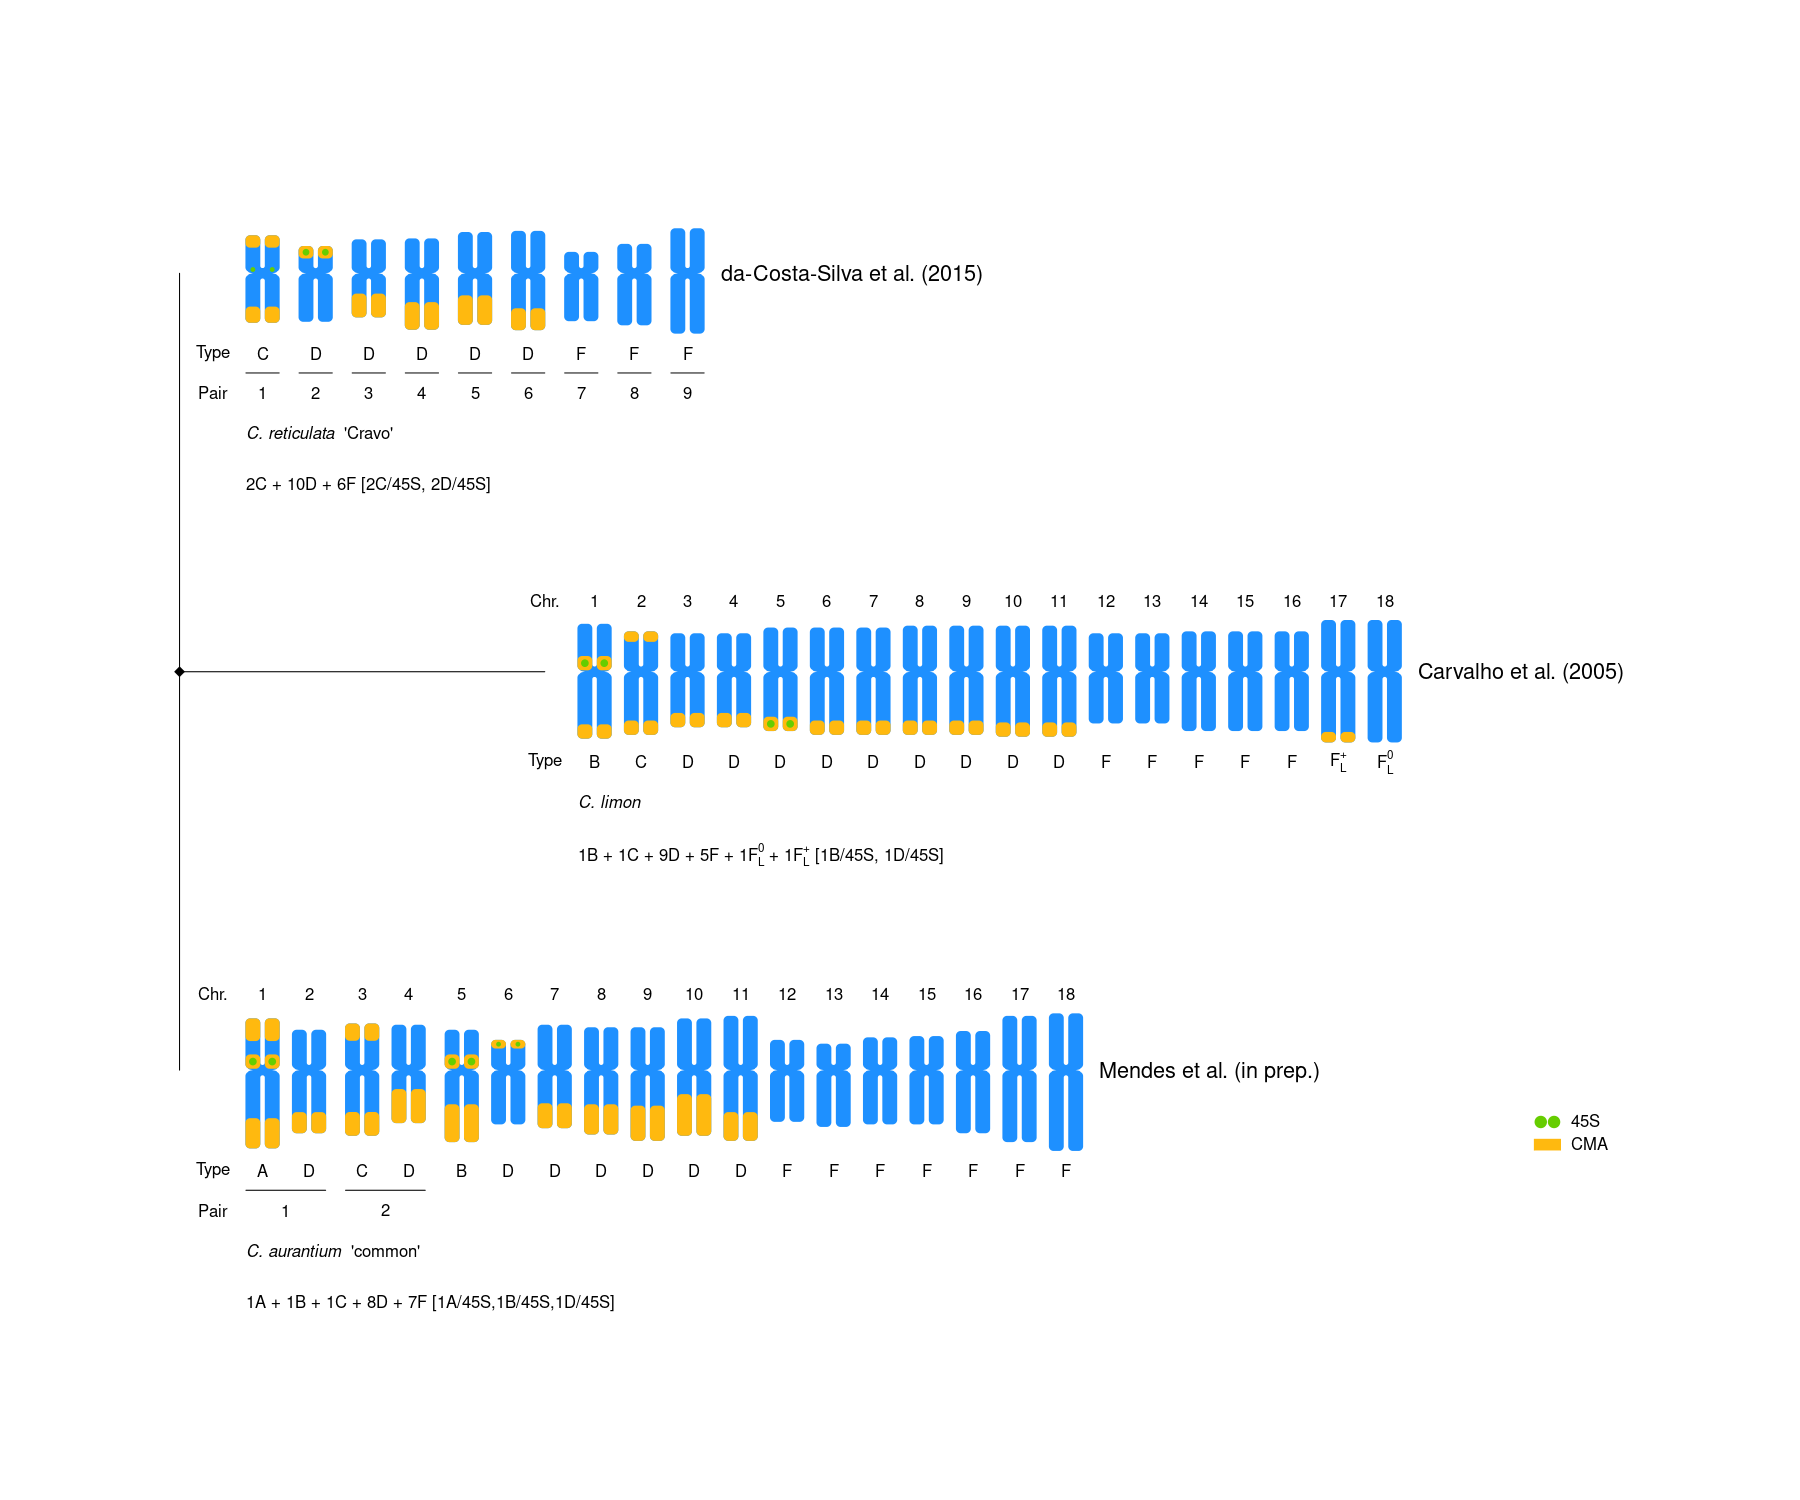

In [31]:
{
#svg("climon.svg",width=12,height=10 )
par(mar=rep(0,4),oma=rep(0,4))

options(repr.plot.width = 18, repr.plot.height = 15, repr.plot.res = 100)

suppressMessages(
plotIdiograms(dfChrSize= threeSize,   # chr. size data.frame
              dfMarkPos= threeMarkPos,# mark position data.frame (inc. cen.)
              dfMarkColor=markStyleDF,# mark style d.f.
              
              orderChr = "original",  # order of chr. as in d.f.
              chrIdPatternRem="_.*",  # pattern to remove from chr. names
              karHeight = 2,          # karyotype height
              karHeiSpace = 6,        # height + separ. among karyot.
              
              chrSpacing=.20,         # separ. among chr.
              chrColor= "dodgerblue" 
              ,distTextChr = .9       # distance text to chr.
              
              ,legendWidth = .8       # legend item width
              ,legendHeight = 3       # legend item height
              ,markLabelSpacer = 2    # legend spacer
              ,ruler=FALSE            # do not use ruler
              ,chrIndex = ""          # do not print chr. index
              ,morpho=""              # do not print morphology
              ,karIndex = FALSE       # do not print kar. index
              
              #,colorBorderMark="black"# color of border of marks
              ,lwd.chr = 1            # border width
              
              ,OTUfont=3              # OTU name in italics
              
              ,leftNotes=leftNotesdf  # data.frame with notes (formula)
              ,notesTextSize = 1.3    # font size of notes
              ,leftNotesPosX = 0      # horizontal pos. of formula
              ,leftNotesPosY = 1      # vertical pos. of formula
              ,notes = notesdf        # authors
              
              ,classGroupName = "Pair"# name for groups 
              ,chrNameUp = TRUE       # use col. chrNameUp
              ,classChrName = "Type"  # change default title of inferior name
              ,classChrNameUp = "Chr."# change default title of upper name
              
              ,ylimBotMod = 1         # modify ylim bottom argument
              ,ylimTopMod = 0         # modify ylim top argument
              ,xlimLeftMod = 2        # modify left xlim
              ,xlimRightMod = 5       # modify right xlim
              
              ,threshold=40           # fixes shrinking of scale, needed because some chr. greater than 3.5 um
              ,moveKarHor = "C. limon"# kar. to move to right
              ,mkhValue = 5           # move cariótipo para direita 
              ,anchor=TRUE            # parental structure
              ,moveAnchorV = -1       # move anchor
              ,anchorVsizeF=1         # anchor vertical size factor modifier
              ,karSepar = F           # modif. separ de karyo.
)
)
#dev.off() # close svg
}


</div>

For a plot of GISH of *Citrus*, visit the GISH chapter

## *Citrus* Functions

Details of functions can be found with:

In [33]:
if(F){
?citrusSize 
?citrusMarkPos 
?markOverCMA
}

Or in: [https://ferroao.gitlab.io/idiogramFISH/reference/citrusSize.html](https://ferroao.gitlab.io/idiogramFISH/reference/citrusSize.html)